In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns

In [2]:
import matplotlib as mpl

#fontpath = '/usr/share/fonts/NanumFont/NanumGothic.ttf'
#mpl.font_manager.FontProperties(fname=fontpath)

mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('year.csv', thousands=',')

In [4]:
df.head()

,년도,내국인,외국인,합계,매출액,매출원가,매출이익,판매비와관리비,광고선전비,판매촉진비,영업손익
0,2010,1620892,124958,1745850,3931668,3260543,671125,827519,39718,12274,-156394
1,2011,1713808,132928,1846736,4257554,3379250,878304,831023,33175,12161,47282
2,2012,1804342,139819,1944161,4385960,3582735,803226,1188407,41425,11551,-385182
3,2013,1898594,147491,2046085,4735057,3778054,957004,948334,56451,9907,8669
4,2014,1769538,137193,1906731,4912096,3969545,942551,931599,62443,7891,10952


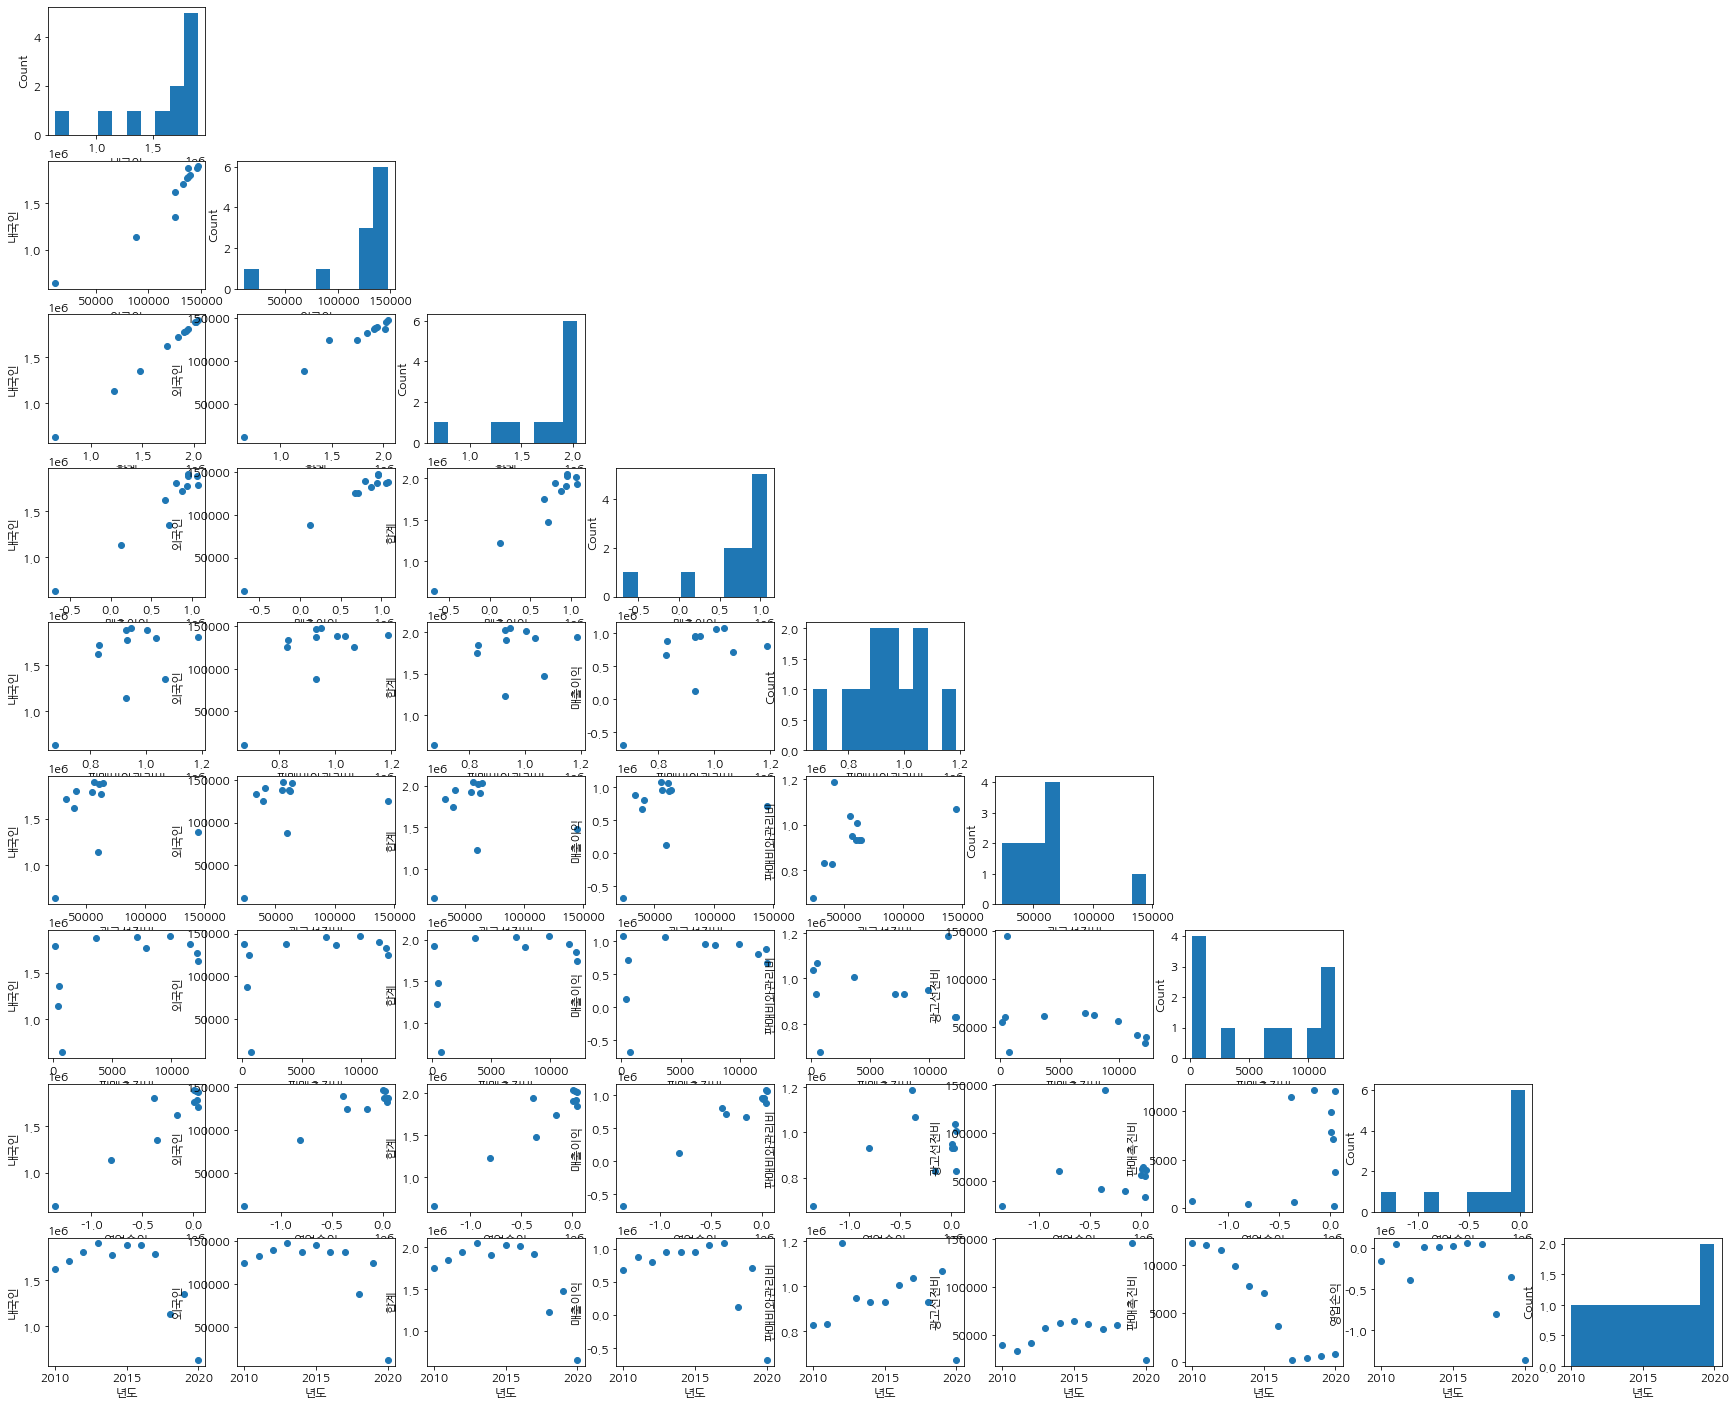

In [5]:
cols = ['내국인','외국인','합계','매출이익','판매비와관리비','광고선전비','판매촉진비','영업손익','년도']
scatterplotmatrix(df[cols].values, figsize=(30,25), names=cols, alpha=1)
#plt.tight_layout()
plt.show()

In [6]:
from mlxtend.plotting import heatmap

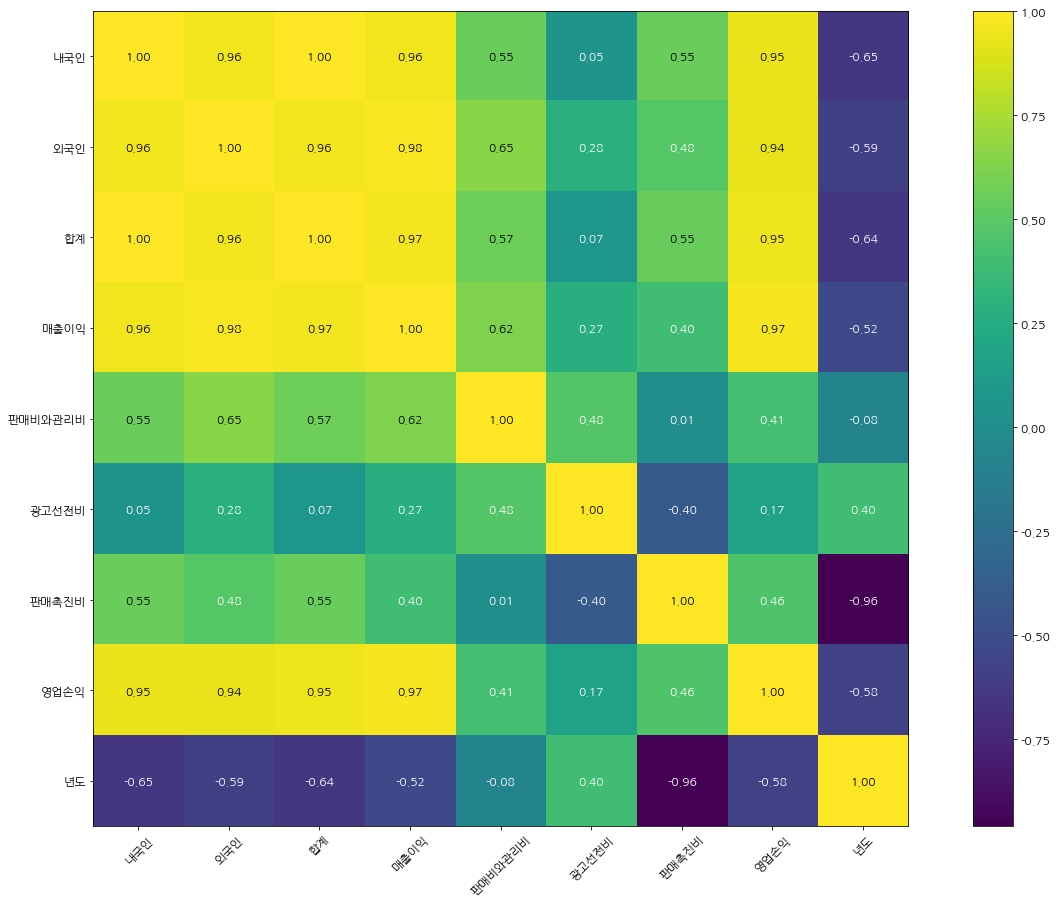

In [7]:
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols, figsize=(23,15))
plt.show()

In [8]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, Y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return self.net_input(X)

In [9]:
X = df[['매출이익']].values
y = df['합계'].values

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

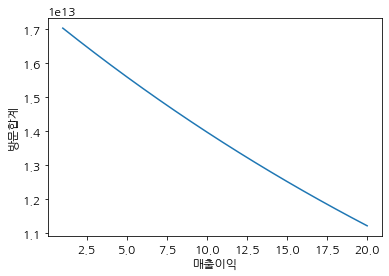

In [12]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('방문합계')
plt.xlabel('매출이익')
plt.show()

In [13]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolors='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

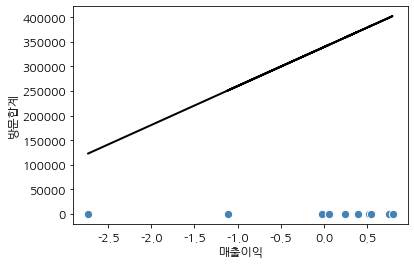

In [14]:
lin_regplot(X_std, y_std, lr)
plt.ylabel('방문합계')
plt.xlabel('매출이익')
plt.show()